<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn 

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [17]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [18]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [19]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [20]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<ipython-input-22-fe7b9f3f62ef>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'])


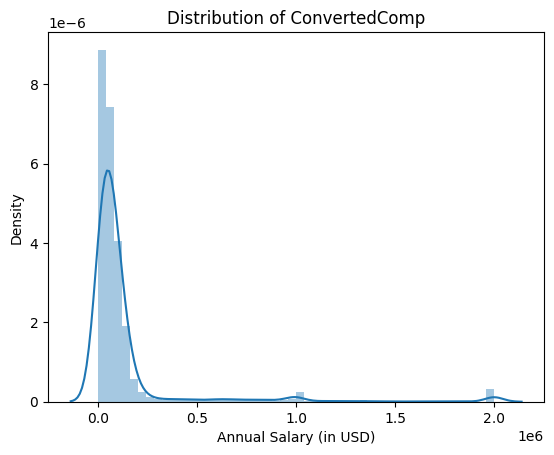

In [22]:
import seaborn as sns
sns.distplot(df['ConvertedComp'])
plt.title('Distribution of ConvertedComp')
plt.xlabel('Annual Salary (in USD)')
plt.ylabel('Density')
plt.show()

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

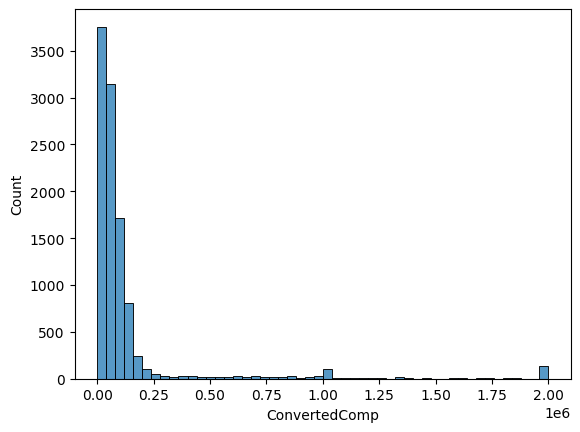

In [23]:
sns.histplot(df['ConvertedComp'], bins=50, kde=False)

What is the median of the column `ConvertedComp`?


In [24]:
median_compensation = df['ConvertedComp'].median()
print("Median of ConvertedComp: ", median_compensation)

Median of ConvertedComp:  57745.0


How many responders identified themselves only as a **Man**?


In [27]:
man_count = df['Gender'].value_counts()['Man']
print("Count of 'Man' in Gender column: ", man_count)

Count of 'Man' in Gender column:  10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [28]:
median_compensation_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print("Median of ConvertedComp for 'Woman': ", median_compensation_woman)

Median of ConvertedComp for 'Woman':  57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [30]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


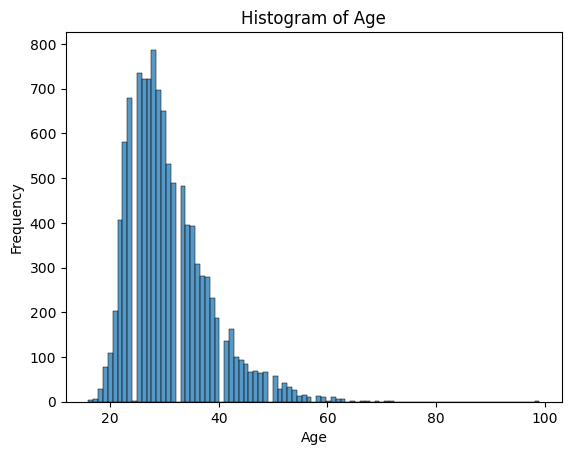

In [33]:
df = df[df['Age'].notna()]
sns.histplot(df['Age'], kde=False)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


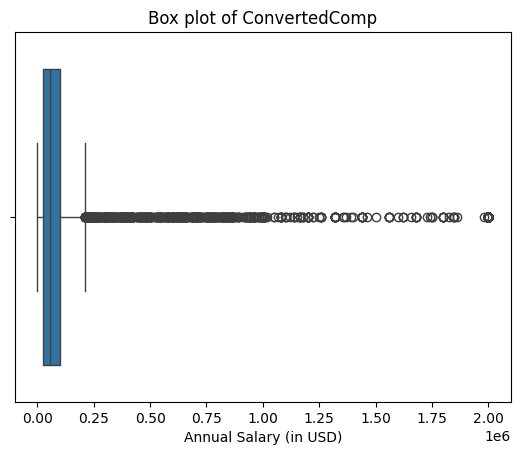

In [34]:
sns.boxplot(x=df['ConvertedComp'])
plt.title('Box plot of ConvertedComp')
plt.xlabel('Annual Salary (in USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [35]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range for 'ConvertedComp': ", IQR)

Inter Quartile Range for 'ConvertedComp':  73165.5


Find out the upper and lower bounds.


In [37]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound (Q1) for 'ConvertedComp': ", lower_bound)
print("Upper bound (Q3) for 'ConvertedComp': ", upper_bound)

Lower bound (Q1) for 'ConvertedComp':  -82913.75
Upper bound (Q3) for 'ConvertedComp':  209748.25


Identify how many outliers are there in the `ConvertedComp` column.


In [38]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
print("Number of outliers in 'ConvertedComp': ", len(outliers))

Number of outliers in 'ConvertedComp':  861


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [39]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
df_no_outliers.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9493.000000,9.493000e+03,9493.000000,9457.000000,7455.000000,9493.000000
mean,12519.288844,7.321635e+05,59740.170441,41.895104,4.717439,30.695860
std,7240.656402,7.259275e+06,43334.404562,24.851555,4.354045,7.346625
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6246.000000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12590.000000,6.250000e+04,52356.000000,40.000000,4.000000,29.000000
75%,18818.000000,1.150000e+05,85051.000000,42.000000,5.000000,34.000000
max,25141.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [41]:
# your code goes here
df.corr()["Age"]

<ipython-input-41-2e6f595302c2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Age"]


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
